# TRANCOS DATA_SET: DESCRIPTION, DOWNLOAD AND VALIDATION

# Description:
"TRaffic ANd COngestionS (TRANCOS)" dataset is a benchmark for vehicle counting in traffic congestion situations. It consists of 1244 images, with a total of 46796 vehicles annotated.

The objects have been manually annotated using dots. 

All the images have been captured using the publicly available video surveillance cameras of the Dirección General de Tráfico of Spain.

TRANCOS dataset is divided into three datasets: training (403 images), validation (420 images) and test (421 images)."

Each dataset is made up of images, each of which has the following related files: 
- "XXX.jpg" file: Traffic image,
- "XXXdot.png" file: Corresponding annotated objects using an image of dots,
- "XXX.txt" file: text document with coordinates of the annotated objects,
- "XXXmask.mat" Matlab file: Region of interest (ROI), deﬁning the region considered for annotation purposes. 

For futher information see: http://agamenon.tsc.uah.es/Personales/rlopez/data/trancos/



# Download instructions:

To download TRANCOS dataset, we strongly recommed to go DIRECTLY to the next link:

http://agamenon.tsc.uah.es/Personales/rlopez/data/trancos/TRANCOS_v3.tar.gz

<br>


Note: I had problems to open some mask filters down loaded from other sources.

<br>

Ones dowloaded, store the folder "TRANCOS_V3" and its content directly in the main folder of this project (**'TFM_DataScience_master'**).

<br>

**WARNING: The paths you will find in this project, to collect files from TRANCOS dataset, are based on this folders structure.**


# Validation:

First, we will import the required libreries

In [1]:
import glob
import os
from PIL import Image,ImageFilter,ImageDraw
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import scipy.io as sio
import skimage.io
import csv
import math

%matplotlib inline

As mentioned above, there are 4 files per image.<br>
Let´s check how many files of each type there are:

In [2]:
#Root for all files:
root = './TRANCOS_v3/images/'

- ***"XXX.jpg" file: Traffic image***

In [3]:
img_paths = []

for img_path in glob.glob(os.path.join(root,'*.jpg')):
        img_paths.append(img_path.replace('\\','/'))

len(img_paths)

1244

Let´s see a sample:

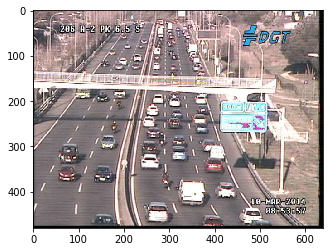

In [4]:
plt.imshow(Image.open(img_paths[0]))

In [5]:
#Checking whether all the images have the same shape (480x640x3):

count_0 = 0
count_1 = 0
count_2 = 0

for path in img_paths:
    img = cv2.imread(path)  
    
    if img.shape[0] == 480:
        count_0 += 1
        
    if img.shape[1] == 640:
        count_1 += 1
    
    if img.shape[2] == 3:
        count_2 += 1
    
    
    else:
        print(img.shape)

print(count_0,count_1,count_2)

1244 1244 1244


Yes, all the images have the same shape (480x640x3)

- ***"XXXmask.mat" Matlab file: Region of interest (ROI)***

In [6]:
mask_paths = []

for img_path in glob.glob(os.path.join(root,'*.mat')):
        mask_paths.append(img_path.replace('\\','/'))

len(mask_paths)

1244

Let´s see a sample:

In [7]:
mask_sample = sio.loadmat(mask_paths[0], chars_as_strings=1, matlab_compatible=1)
mask_sample = mask_sample.get('BW')

mask_sample

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
#Checking whether all the masks have the same shape (480x640):

count_0 = 0
count_1 = 0

for mask_path in mask_paths:
    mask = sio.loadmat(mask_path, chars_as_strings=1, matlab_compatible=1)
    mask = mask.get('BW')
    
    if mask.shape[0] == 480:
        count_0 += 1
        
    if mask.shape[1] == 640:
        count_1 += 1
    
       
    else:
        print(mask.shape)

print(count_0,count_1)

1244 1244


Yes, all the masks have the same shape  (480x640) and they fit with the images size

- ***"XXXdot.png" file: Corresponding annotated objects using an image of dots***

In [9]:
dots_paths = []

for dots_path in glob.glob(os.path.join(root,'*.png')):
        dots_paths.append(dots_path.replace('\\','/'))

len(dots_paths)

1244

Let´s see a sample:

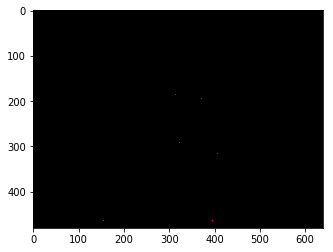

In [10]:
plt.imshow(Image.open(dots_paths[0]))

They consist of "red" dots on a black background

In [11]:
#Checking whether all the annotated images have the same shape (480x640x3):

count_0 = 0
count_1 = 0
count_2 = 0

for dot_path in dots_paths:
    dot_img = cv2.imread(dot_path)  
    
    if dot_img.shape[0] == 480:
        count_0 += 1
        
    if dot_img.shape[1] == 640:
        count_1 += 1
    
    if dot_img.shape[2] == 3:
        count_2 += 1
    
    
    else:
        print(dot_img.shape)

print(count_0,count_1,count_2)

1244 1244 1244


Yes, all the annotated images have the same shape (480x640x3) and they fit with the images size 

<a id="txt_section"></a>
- ***"XXX.txt" file: text document with coordinates of the annotated objects*** 

In [12]:
coord_paths = []

for coord_path in glob.glob(os.path.join(root,'*.txt')):
        coord_paths.append(coord_path.replace('\\','/'))

len(coord_paths)

1245

There is one more file than images.<br>
It is the file with coordinates related to image# 421 from the training dataset ('image-2-000421.txt file').<br>
It may be an error.<br>
<font color=red>***Anyhow, the corresponding image has not been included in TRANCOS dataset so, 'image-2-000421.txt' file can not be used in this project.***</font>

### The coordinates from "XXX.txt" files should tie dot positions from "XXXdot.png" files.
Let´s check it:

First, we will convert lists of coordinates, from "XXX.txt" files,  into arrays with the original image shape and, <br>
they will be saved to a list

In [13]:
coord_arrays_list = [] 

for img_path in img_paths:
    x = []
    y = []
    coord_array = np.zeros((480,640))
    
    with open(img_path.replace('.jpg','.txt'),'r') as f:
        reader = csv.reader(f,delimiter='\t')
        for row in reader:
            x.append(int(row[0])-1)
            y.append(int(row[1])-1)
        
    gt = list(zip(x,y))    
            
    for i in range(0,len(gt)):
        coord_array[int(gt[i][1]),int(gt[i][0])]=1.   
            
    coord_arrays_list.append(coord_array)


Then, we will read the red layer of "XXXdot.png" images, where the "red" annotated dots are stored.
Since the value in both files is 1 where an object is annotated and 0 otherwise, comparing their values position by position, we will find discrepacies, if any.


In [14]:
diff_coord_dots = []

for i in range(len(coord_arrays_list)):
    coord = coord_arrays_list[i]
    
    dots = skimage.img_as_float(skimage.io.imread(dots_paths[i], as_grey=not True)).astype(np.float32)
    dots = dots[:,:,0] #We only take the red layer from  'RGB' images
    
    #Comparing both arrays position by position:
    diff = np.subtract(dots.flatten(), coord.flatten())
    diff_sum = 0
    for n in diff: 
        if n != 0:
            diff_sum += 1
    
    diff_coord_dots.append(diff_sum)

In [15]:
sum(diff_coord_dots)

0

The total addition of discrepacies for the whole dataset is 0. <br>
Thus, ***the coordinates from "XXX.txt" files tie dot positions from "XXXdot.png" files***

Now, we are going to analyze two relevant image features on each dataset (training, validation and test):<br>
- vehicles overlapping and,
- ground_truth (number of vehicles measures by a density map)

To assess the level of overlapping of each image, we are going to calculate the number of vehicles whose distance to their closest one is lower than a threshold.

We will use the following function for this purpose:

In [16]:
def overlapping_func(coord_list, threshold):

    '''
    This function returns the number of positions whose distance to their closest one is 
    equal or lower than a threshold.
    
    @param: coord_list: List of coordinates of the objects
    @param: threshold: maximum distance from one position to another, required for positions to be counted. 
    
    Note: In this project, position = vehicle
    
    '''
    list_len = len(coord_list) #number of coordinates
    
    distances = np.zeros((list_len,list_len))  #To store distances between two coordinates
    
    #Iterates over a list of coordinates, calculating the euclidean distance between 
    #every pair of coordinates (positions) of the list
    for i,x in enumerate(coord_list):
        for j,y in enumerate(coord_list):
            distances[i,j] = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
            
    
    min_distances = [] #List of distances below the threshold
    
    #Iterates over positions (rows) to collect the distance of each position to its closest one.
    #Then, it selects only those distances lower than the threshold
    for ind,dist in enumerate(distances):
        n_clean = list(dist) #List of distances of a given object to the rest
        del n_clean[ind] #Clearing the distance of an object to itself, which is "0"
        min_dist = min(n_clean) #Distance of a given object to its closest one
        if min_dist<threshold:
            min_distances.append(min_dist)
        
    #Number of distances below the threshold    
    return len(min_distances)  

The threshold we are going to use is set to 15 in notebook "iv-analysis_for_improvement" of this project

In [17]:
df_list = []
threshold = 15

for img_path in img_paths:
 
    x=[]
    y=[]
    
    with open(img_path.replace('.jpg','.txt'),'r') as f:
        reader = csv.reader(f,delimiter='\t')
        for row in reader:
            x.append(int(row[0]))
            y.append(int(row[1]))
        
    dots_gt = list(zip(x,y))
    
    dots_below_th = overlapping_func(dots_gt,threshold)
        
    img_number = str(img_path[-12:-4])
        
    row = [img_number, dots_below_th]
   
    df_list.append(row)

df_dots_below_th =  pd.DataFrame(df_list, columns=['img', 'overlapping']) 



In [18]:
train_density = df_dots_below_th[df_dots_below_th['img'].str.startswith("1-")]
val_density = df_dots_below_th[df_dots_below_th['img'].str.startswith("2-")]
test_density = df_dots_below_th[df_dots_below_th['img'].str.startswith("3-")]

In [19]:
train_dots_num = []
val_dots_num = []
test_dots_num = []

for dots_path in dots_paths:
    if dots_path[-16:-15] == '1':
        dots = skimage.img_as_float(skimage.io.imread(dots_path, as_grey=not True)).astype(np.float32)
        dots = np.sum(dots[:,:,0]) #We only take the red layer from  'RGB' images
        train_dots_num.append(dots)
        
    elif dots_path[-16:-15] == '2':
        dots = skimage.img_as_float(skimage.io.imread(dots_path, as_grey=not True)).astype(np.float32)
        dots = np.sum(dots[:,:,0]) #We only take the red layer from  'RGB' images
        val_dots_num.append(dots)
        
    elif dots_path[-16:-15] == '3':
        dots = skimage.img_as_float(skimage.io.imread(dots_path, as_grey=not True)).astype(np.float32)
        dots = np.sum(dots[:,:,0]) #We only take the red layer from  'RGB' images
        test_dots_num.append(dots)
    

The results are as follows:

Text(0.5,1,'Test_dataset: Ground_truth histogram')

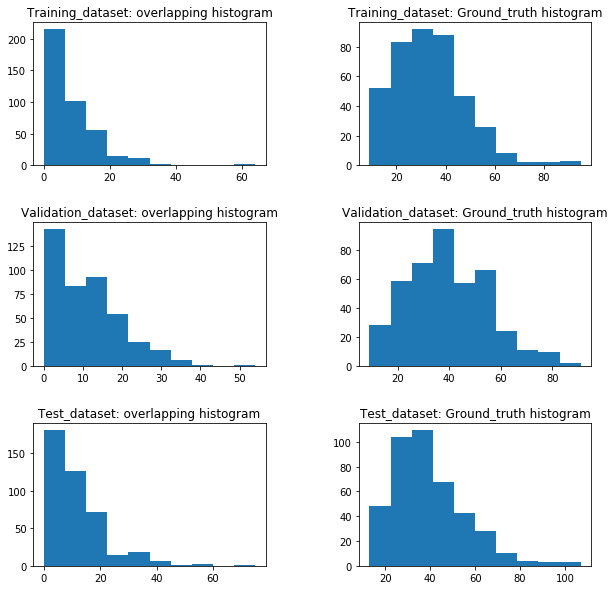

In [21]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(3, 2, 1)
ax1.hist( train_density['overlapping'])
plt.title('Training_dataset: overlapping histogram')

ax2 =  fig.add_subplot(3, 2, 3)
ax2.hist( val_density['overlapping'])
plt.title('Validation_dataset: overlapping histogram')

ax3 =  fig.add_subplot(3, 2, 5)
ax3.hist( test_density['overlapping'])
plt.title('Test_dataset: overlapping histogram')

ax4 = fig.add_subplot(3, 2, 2)
ax4.hist(train_dots_num)
plt.title('Training_dataset: Ground_truth histogram')

ax5 = fig.add_subplot(3, 2, 4)
ax5.hist(val_dots_num, bins=10)
plt.title('Validation_dataset: Ground_truth histogram')

ax6 = fig.add_subplot(3, 2, 6)
ax6.hist(test_dots_num)
plt.title('Test_dataset: Ground_truth histogram')


**Unbalanced datasets:** <br>
Very low amount of images with high ground_truth (>50) and/or high overlapping (>20).

### CONCLUSIONS:
***TRANCOS dataset meets the minimum requirements for this project. <br>
We just have to keep in mind that we mustn´t use the file: image-2-000421.txt (See ['XXX.txt file'](#txt_section) section of this notebook for explanations).***